In [ ]:
import matplotlib
matplotlib.use('PS')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pais = 'Italy'

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df = pd.read_csv(url,index_col=0)
print(df)

df = df.drop(columns=['Lat','Long'])
df = df.groupby('Country/Region').agg('sum')
print(df)

df = df.T
print(df)

DATOS = df[pais]

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

dfD = pd.read_csv(url,index_col=0)
dfD = dfD.drop(columns=['Lat','Long'])
dfD = dfD.groupby('Country/Region').agg('sum')
dfD = dfD.T
DEATHS = dfD[pais]


print(DEATHS)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

dfR = pd.read_csv(url,index_col=0)
dfR = dfR.drop(columns=['Lat','Long'])
dfR = dfR.groupby('Country/Region').agg('sum')
dfR = dfR.T
RECOVERED = dfR[pais]
print(RECOVERED)

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'

dfV = pd.read_csv(url,index_col=0)
print(dfV)

dfV = dfV.T
VACCINATIONS = dfV[pais]

#print(CHILEV)

VACCINATIONS = VACCINATIONS.T
print(VACCINATIONS)


                    Country/Region        Lat  ...  7/20/21  7/21/21
Province/State                                 ...                  
NaN                    Afghanistan  33.939110  ...   142414   142414
NaN                        Albania  41.153300  ...   132740   132763
NaN                        Algeria  28.033900  ...   155784   157005
NaN                        Andorra  42.506300  ...    14379    14379
NaN                         Angola -11.202700  ...    41061    41227
...                            ...        ...  ...      ...      ...
NaN                        Vietnam  14.058324  ...    65607    71144
NaN             West Bank and Gaza  31.952200  ...   315761   315876
NaN                          Yemen  15.552727  ...     6992     6997
NaN                         Zambia -13.133897  ...   187602   188573
NaN                       Zimbabwe -19.015438  ...    88415    91120

[279 rows x 550 columns]
                    1/22/20  1/23/20  1/24/20  ...  7/19/21  7/20/21  7/21/21

In [ ]:
if pais == 'Chile':
  N = 18_950_000
elif pais == 'Germany':
  N = 83_157_000
elif pais == 'Austria':
  N = 8_292_322
elif pais == 'Czechia':
  N = 10_693_939
elif pais == 'France':
  N = 67_320_216
elif pais == 'Italy':
  N = 60_360_000
elif pais == 'Romania':
  N = 19_328_838
elif pais == 'Lithuania':
  N = 2_794_090

dfVT = VACCINATIONS['vaccine']
dfVD = VACCINATIONS['date']
dfVN = VACCINATIONS['total_vaccinations']


VV1 = [] # Pfizer Primero en aplicarse
VV2 = [] # Moderna
VV3 = [] # AstraZeneca
VV4 = [] # Johnson&Johnson 

for i in range(len(dfVT)):
  if pais == 'Chile':
    if dfVT[i] == 'Pfizer/BioNTech':
      VV1.append(dfVN[i] / N)
    elif dfVT[i] == 'Sinovac':
      VV2.append(dfVN[i] / N)
    elif dfVT[i] == 'Oxford/AstraZeneca':
      VV3.append(dfVN[i] / N)
  else:
    if dfVT[i] == 'Pfizer/BioNTech':
      VV1.append(dfVN[i] / N)
    elif dfVT[i] == 'Moderna':
      VV2.append(dfVN[i] / N)
    elif dfVT[i] == 'Oxford/AstraZeneca':
      VV3.append(dfVN[i] / N)
    elif dfVT[i] == 'Johnson&Johnson':
      VV4.append(dfVN[i] / N)    

l1 = len(VV1)
l2 = len(VV2)
l3 = len(VV3)
l4 = len(VV4)

print(l1,l2,l3,l4)

207 192 173 98


In [ ]:
#Correr si l1 != l4

if l1 != l4:

  VV1 = VV1[l1-l3:len(VV1)]
  VV2 = VV2[l2-l3:len(VV2)]

  print(l1-l2)

  Z = np.zeros(l3-l4)

  Z = list(Z)
  VV4 = Z + VV4


  print(l3-l4)

  l1 = len(VV1)
  l2 = len(VV2)
  l3 = len(VV3)
  l4 = len(VV4)

  print(l1,l2,l3,l4)

15
75
173 173 173 173


In [ ]:
# Adecuar al país

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/' + pais +  '.csv'


dfV = pd.read_csv(url,index_col=0)
print(dfV)
dfV = dfV.drop(columns=['source_url','vaccine','total_vaccinations'])
print(dfV)
VF = dfV['people_fully_vaccinated']
VV = dfV['people_vaccinated']
DVac = dfV['date']

                date  ... people_fully_vaccinated
location              ...                        
Italy     2020-12-27  ...                       0
Italy     2020-12-28  ...                       0
Italy     2020-12-29  ...                       0
Italy     2020-12-30  ...                       0
Italy     2020-12-31  ...                       0
...              ...  ...                     ...
Italy     2021-07-17  ...                25996098
Italy     2021-07-18  ...                26353522
Italy     2021-07-19  ...                26803247
Italy     2021-07-20  ...                27247591
Italy     2021-07-21  ...                27686217

[207 rows x 6 columns]
                date  people_vaccinated  people_fully_vaccinated
location                                                        
Italy     2020-12-27               7223                        0
Italy     2020-12-28               8658                        0
Italy     2020-12-29               9677                        0
I

In [ ]:
f = len(VF)
print(VV1[f-1])
print(VV[f-1] / N)
print(VF[f-1] / N)
print(p)
print(V1D[f-1] + V2D[f-1] + V3D[f-1] + V4D[f-1])

IndexError: ignored

In [ ]:
PF = []
for i in range(len(VV)):
  total = VV[i] + VF[i]
  PF.append(VV[i]/total)

V1D = []
F1D = []
V2D = []
F2D = []
V3D = []
F3D = []
V4D = []

p = PF[len(PF)-1]

if pais == 'Chile':
  for i in range(len(VV1)):
    #p = PF[i]
    V1D.append(VV1[i]*p)
    V2D.append(VV2[i]*p)
    V3D.append(VV3[i]*p)
else:
  for i in range(len(VV1)):
    #p = PF[i]
    V1D.append(VV1[i]*p)
    V2D.append(VV2[i]*p)
    V3D.append(VV3[i]*p)
    V4D.append(VV4[i])

In [ ]:
M = len(RECOVERED)

#S = []
I = []
R = []
D = []
T = []


for idx in range(M):
  
  r = RECOVERED[idx]
  d = DEATHS[idx]
  if idx > 0:
    i = DATOS[idx] - r -d 
  else:
    i = 0
  #print(r,d,i,v,f)
  #s = N - r -d - i -f 

  #F.append(f / N)
  #S.append(s / N)
  I.append(i / N)
  R.append(r / N)
  D.append(d / N )
  T.append(idx+1)

dos = 0

print('E(0)=',I[M-l1-dos -14])

E0 = I[M-l1 - dos -14]

#SD = S[M-l1:M-dos]
ID = I[M-l1-dos:M-dos]
RD = R[M-l1-dos:M-dos]
TD = T[M-l1-dos:M-dos] # QUITAR -2 
DD = D[M-l1-dos:M-dos]
print(len(ID),l1)

E(0)= 0.009239844267726971
173 173


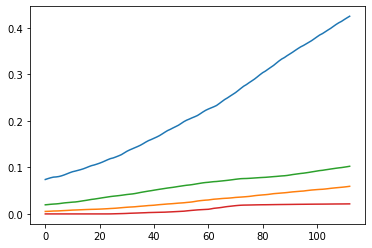

In [ ]:
plt.plot(V1D)
plt.plot(V2D)
plt.plot(V3D)
plt.plot(V4D)
#plt.plot(ID)
#plt.plot(RD)
#plt.plot(DD)
plt.show()

In [ ]:
lv = len(V1D)
print(V1D[lv-1]+V2D[lv-1] + V3D[lv-1] + V4D[lv-1])

0.501975135427992


In [ ]:
# No ejecutar

if pais == 'Germany':
  t0 = 125 
elif pais == 'Czechia':
  t0 = 35
elif pais == 'Romania':
  t0 = 45
elif pais == 'Lithuania':
  t0 = 100
elif pais == 'Italy':
  t0 = 60
# Alemania 125
# Italia 60
# Rumania 45
# Lituania 100
# Checa

print('E(0)=',I[t0 +5])
E0 = I[t0 +5]

f10 = V1D[t0 - 21]
f20 = V2D[t0 - 21]
f30 = V3D[t0 - 84] # Uy


V1D = V1D[t0:l1]
V2D = V2D[t0:l1]
V3D = V3D[t0:l1]
V4D = V4D[t0:l1]
ID  = ID[t0:l1]
RD  = RD[t0:l1]
DD  = DD[t0:l1]
TD = TD[t0:l1]

E(0)= 0.0011002982107355865


In [ ]:
print(E0,ID[0],ID[4])
E0 = ID[4]
f30 = 0
#E0 = 0.0002192599540627969


0.0011002982107355865 0.00931921802518224 0.009427352551358516


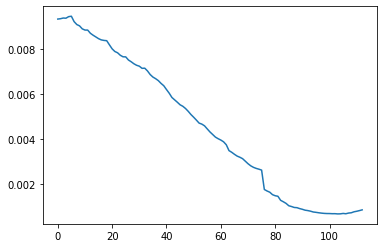

In [ ]:
plt.plot(ID)
plt.show()

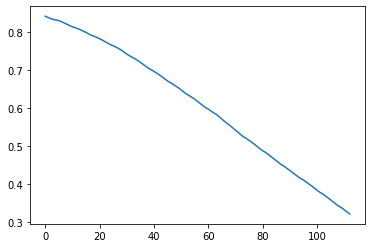

In [ ]:
SD = 1 - np.array(V1D) - np.array(V2D) - np.array(V3D) - np.array(V4D) - np.array(ID) - np.array(RD) - np.array(DD)
SD = list(SD)
plt.plot(SD)
plt.show()

In [ ]:
from math import exp

#def rr(rr_0,rr_1,t):
#  return rr_0#*exp(rr_1*t)

def rr2(rr0,rr1,theta_rr,t):
  if t < theta_rr:
    return rr0
  else:
    return rr1

# PR = [rr_1,rr_2,rr_3,rr_40,rr_41,theta_rr4]
# PL = [l_1,l_2,l_3]

def fV1(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  rr = PR[0]
  #rr_1 = PR[1]
  l = PL[0]

  return (1-e1A)*rr*S - e1L1*(beta1*I + beta2*A)*V1 - l*V1

def fV2(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t): # Espacial
  rr = PR[1]
  l = PL[1]

  return (1-e2A)*rr*S - e2L1*(beta1*I + beta2*A)*V2 - l*V2

def fV3(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  rr = PR[2]
  l = PL[2]

  return (1-e3A)*rr*S - e3L1*(beta1*I + beta2*A)*V3 - l*V3

def fV4(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t): # Especial
  rr0 = PR[3]
  rr1 = PR[4]
  theta_rr = PR[5]
  return (1-e4A)*rr2(rr0,rr1,theta_rr,t)*S - e4L1*(beta1*I + beta2*A)*V4 - alpha4*V4

def fF1(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  #rr0 = PR[0]
  #rr1 = PR[1]
  l = PL[0]

  return l*V1 - alpha1*F1 - e1L2*(beta1*I + beta2*A)*F1

def fF2(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  #rr_0 = PR[2]
  #rr_1 = PR[3]
  l = PL[1]
  return l*V2 - alpha2*F2 - e2L2*(beta1*I + beta2*A)*F2

def fF3(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  #rr0 = PR[4]
  #rr1 = PR[5]
  l = PL[2]
  return l*V3 - alpha3*F3 - e3L2*(beta1*I + beta2*A)*F3

def fS(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  rr_1 = PR[0]
  rr_2 = PR[1]
  rr_3 = PR[2]
  rr_40 = PR[3]
  rr_41 = PR[4]
  theta_rr = PR[5]
  ret = -(beta1*I + beta2*A)*S 
  ret += alpha1*F1 - (1-e1A)*rr_1*S
  ret += alpha2*F2 - (1-e2A)*rr_2*S
  ret += alpha3*F3 - (1-e3A)*rr_3*S
  ret += alpha4*V4 - (1-e4A)*rr2(rr_40,rr_41,theta_rr,t)*S
  return ret

def fE(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return (beta1*I + beta2*A)*(e1L1*V1+ e1L2*F1 + e2L1*V2 + e2L2*F2 + e3L1*V3+e3L2*F3 + e4L1*V4) + (beta1*I + beta2*A)*S - sigma*E

def fI(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  #w = PL[6]
  return w*sigma*E - (gamma + delta)*I

def fA(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  #w = PL[6]
  return (1-w)*sigma*E - gamma*A

def fR(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return gamma*(I + A) 

In [ ]:
# Pfizer
alpha1 = 1/180
e1L1 = 1-0.52
e1L2 = 1-0.95
e1A = 3.77e-4

# Moderna
alpha2 = 1/180
e2L1 = 1-0.8
e2L2 = 1-0.941
e2A = 7.23e-4

# AstraZeneca

alpha3 = 1/180
e3L1 = 1-0.463
e3L2 = 1-0.76
e3A = 0.00268

# Johnson&Johnson

alpha4 = 1/180
e4L1 = 1-0.663
e4A = 0.0091

sigma = 1 / 5.2
#w = 0.2

In [ ]:
rr_1 = 0.001#825745388772445
rr_2 = 0.0001110806299061287
rr_3 = 0.00011
rr_40 = 7.35205426e-06 
rr_41 = 0.037
theta_rr = 76

In [ ]:
rr_10 = 8.097e-3
rr_11 = 0.031869

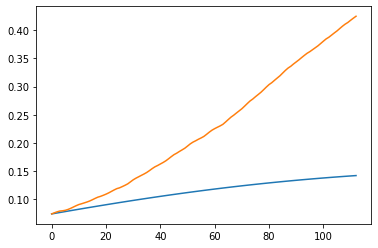

In [ ]:
# Adaptar
VnD = V1D + []
rr = rr_1

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
def semiLossR(rr,VD):
  V = []

  v = VD[0]
  for t in range(len(TD)):
    s = SD[t]
    V.append(v)
    v = v + rr*s

  V = np.array(V)
  VDnp = np.array(VD)
  return np.sum((V-VDnp)**2)

print(semiLossR(rr,VnD)) 

2.3172371904926883


In [ ]:
eta = 0.01#np.array([0.001,0.001])
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

#X = np.array([rr_0,rr_1])
print(semiLossR(rr,VnD))

for epocs in range(10000):
  d1 = (semiLossR(rr + h1,VnD) - semiLossR(rr,VnD))/h1

  rrt = rr - eta*d1

  #print(Xt)

  if semiLossR(rrt,VnD) > semiLossR(rr,VnD):
    eta = eta*0.5
  else:
    rr = rrt*1

  print(semiLossR(rr,VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224561758
0.12618409224

In [ ]:
rr_1 = rr*1

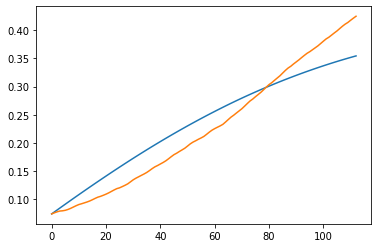

In [ ]:
# Adaptar
VnD = V1D + []
rr = rr_1

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s  

plt.plot(V)
plt.plot(VnD)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


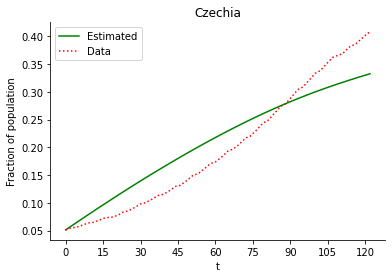

In [ ]:
from matplotlib.ticker import MaxNLocator

fig,ax = plt.subplots()

#fig = plt.figure(figsize=(9,11))
ax.plot(V,color='green')
ax.plot(VnD,color='red',linestyle=':')
ax.legend([r'Estimated',r'Data'])


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.set_title = 't'
#ax.yaxis.label.set_title = 'Fraction of population'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.axes.xaxis.title = 't'
ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')
plt.savefig(pais + '-01.eps',bbox_inches='tight')
plt.show()

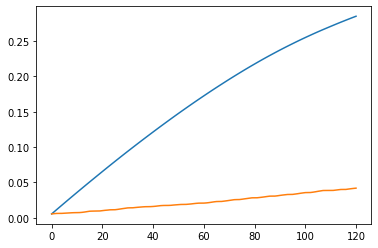

In [ ]:
# Adaptar
VnD = V2D + []
rr = rr_2 + 0.00003

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
print(semiLossR(rr,VnD))

3.0245010797325693


In [ ]:
eta = 0.01#np.array([0.001,0.001])
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

#X = np.array([rr_0,rr_1])
print(semiLossR(rr,VnD))

for epocs in range(10000):
  d1 = (semiLossR(rr + h1,VnD) - semiLossR(rr,VnD))/h1

  rrt = rr - eta*d1

  #print(Xt)

  if semiLossR(rrt,VnD) > semiLossR(rr,VnD):
    eta = eta*0.5
  else:
    rr = rrt*1

  print(semiLossR(rr,VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890514715442105
0.0009890

In [ ]:
rr_2 = rr*1

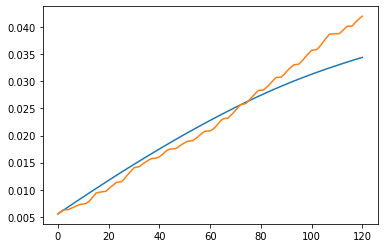

In [ ]:
# Adaptar
VnD = V2D + []
rr = rr_2

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s  

plt.plot(V)
plt.plot(VnD)
plt.show()

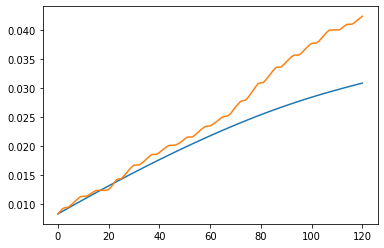

In [ ]:
# Adaptar
VnD = V3D + []
rr = rr_3 + 0.0002

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
print(semiLossR(rr,VnD))

0.02994957981081958


In [ ]:
eta = 0.01#np.array([0.001,0.001])
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

#X = np.array([rr_0,rr_1])
print(semiLossR(rr,VnD))

for epocs in range(10000):
  d1 = (semiLossR(rr + h1,VnD) - semiLossR(rr,VnD))/h1

  rrt = rr - eta*d1

  #print(Xt)

  if semiLossR(rrt,VnD) > semiLossR(rr,VnD):
    eta = eta*0.5
  else:
    rr = rrt*1

  print(semiLossR(rr,VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.000230612068956582
0.0002306

In [ ]:
rr_3 = rr*1

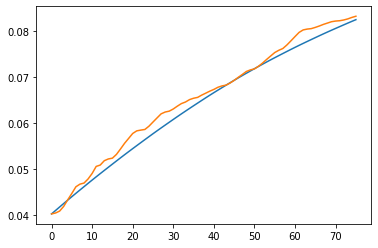

In [ ]:
# Adaptar
VnD = V3D + []
rr = rr_3

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s  

plt.plot(V)
plt.plot(VnD)
plt.show()

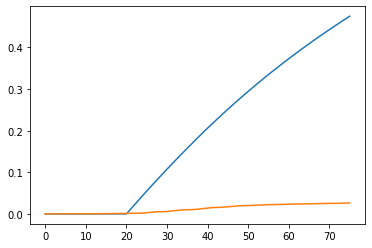

In [ ]:
# Adaptar
VnD = V4D + []
rr_0 = rr_40 # DANGER
rr_1 = rr_41 - 0.02
theta_rr = 20

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  #v = v + rr*s
  v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
def semiLossR2(rr_0,rr_1,VD):
  V = []

  v = VD[0]
  for t in range(len(TD)):
    s = SD[t]
    V.append(v)
    v = v + rr2(rr_0,rr_1,theta_rr,t)*s

  V = np.array(V)
  VDnp = np.array(VD)
  return np.sum((V-VDnp)**2)

print(semiLossR2(rr_0,rr_1,VnD)) 

4.315606093524995


In [ ]:
eta = np.array([0.001,1]) 
h1 = 0.0001


X = np.array([rr_0,rr_1])
print(semiLossR2(X[0],X[1],VnD))

for epocs in range(10000):
  d1 = (semiLossR2(X[0] + h1,X[1],VnD) - semiLossR2(X[0],X[1],VnD))/h1
  d2 = (semiLossR2(X[0],X[1] + h1,VnD) - semiLossR2(X[0],X[1],VnD))/h1
  #d3 = (semiLossR2(X[0],X[1] + h1,X[2],VnD) - semiLossR2(X[0],X[1],X[2],VnD))/h1

  G = np.array([d1,d2])
  #print(G)

  Xt = X - eta*G

  #print(Xt)

  if semiLossR2(Xt[0],Xt[1],VnD) > semiLossR2(X[0],X[1],VnD):
    eta = eta*0.5
  else:
    X = Xt*1


  print(semiLossR2(X[0],X[1],VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841490592906
0.00013560841

In [ ]:
print(X) 

rr_40 = 0#X[0]
rr_41 = X[1]

[-4.07243117e-06  1.01648165e-03]


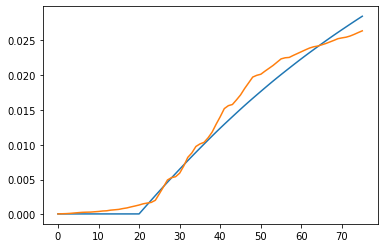

In [ ]:
VnD = V4D + []
rr_0 = rr_40
rr_1 = rr_41 
theta_rr = 20

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  #v = v + rr*s
  v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
#print(rr_0)
print(rr_1)
print(rr_2)
print(rr_3)
print(rr_40,rr_41)
print(theta_rr)

0.005912409888985301
0.0008143292983792277
0.0010072609146060379
0 0.0010164816483204072
20


In [ ]:
rr_1 = 0.005912409888985301
rr_2 = 0.0008143292983792277
rr_3 = 0.0010072609146060379
rr_40,rr_41 = 0, 0.0010164816483204072
theta_rr = 20

In [ ]:
l_1 = 1/21.
l_2 = 1/21.
l_3 = 1/84.
l_4 = 1

In [ ]:
delta = 0.01

def semiLossD(delta):
  d = DD[0]

  D = []

  for t in range(len(TD)):
    i = ID[t] 
    D.append(d)
    d = d + delta*i#v

  D = np.array(D)
  DDnp = np.array(DD)
  return np.sum((D-DDnp)**2)

print(semiLossD(delta))  

3.749767525012915e-05


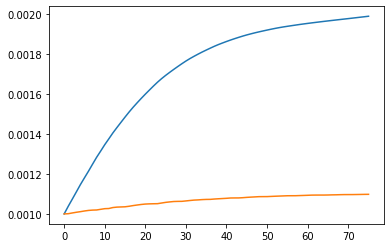

In [ ]:
d = DD[0]

D = []

for t in range(len(TD)):
  i = ID[t] #- FD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  D.append(d)
  d = d + delta*i#v
  
plt.plot(D)
plt.plot(DD)
#plt.plot(ID)
plt.show()

In [ ]:
eta = 0.1
h1 = 0.0001


for epocs in range(10000):
  d = semiLossD(delta + h1) - semiLossD(delta)
  d = d / h1

  #print(G)

  deltat = delta - eta*d

  if semiLossD(deltat) > semiLossD(delta):
    eta = eta*0.8
  else:
    delta = deltat*1


  print(semiLossD(delta))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.973547474786641e-09
1.9735474

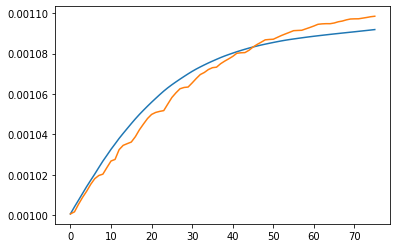

In [ ]:
d = DD[0]

D = []

for t in range(len(TD)):
  i = ID[t] #- FD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  D.append(d)
  d = d + delta*i#v
  
plt.plot(D)
plt.plot(DD)
#plt.plot(ID)
plt.show()

In [ ]:
print(delta)

0.0009243566675101953


In [ ]:
delta = 0.0009243566675101953 

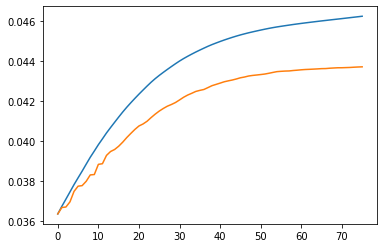

In [ ]:
gamma = 0.1 

rc = RD[0]

RC = []

for t in range(len(TD)):
  i = ID[t] #- FD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  RC.append(rc)
  rc = rc + gamma*i#v
  
plt.plot(RC)
plt.plot(RD)
#plt.plot(ID)
plt.show()

In [ ]:
def semiLossG(gamma):
  rc = RD[0]

  RC = []

  for t in range(len(TD)):
    i = ID[t] 
    RC.append(rc)
    rc = rc + gamma*i#v

  RC = np.array(RC)
  RDnp = np.array(RD)
  return np.sum((RC-RDnp)**2)

print(semiLossG(gamma))

0.00028504788602028744


In [ ]:
eta = 0.1
h1 = 0.0001


for epocs in range(10000):
  d = semiLossG(gamma + h1) - semiLossG(gamma)
  d = d / h1

  #print(G)

  gammat = gamma - eta*d

  if semiLossG(gammat) > semiLossG(gamma):
    eta = eta*0.8
  else:
    gamma = gammat*1


  print(semiLossG(gamma))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.96036825938875e-07
9.9603682

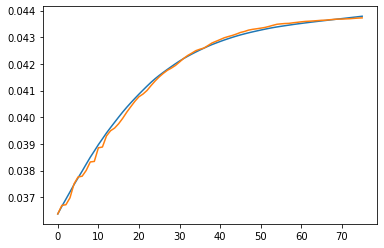

In [ ]:
rc = RD[0]

RC = []

for t in range(len(TD)):
  i = ID[t] #- FD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  RC.append(rc)
  rc = rc + gamma*i#v
  
plt.plot(RC)
plt.plot(RD)
#plt.plot(ID)
plt.show()

In [ ]:
print(gamma)

0.07502640519505582


In [ ]:
gamma = 0.07502640519505582

In [ ]:
def pos(X): 
  sum = 0
  for x in X:
    if x < 0:
      sum += abs(x)
  return sum

def pos2(x):
  if x < 0:
    return abs(x)
  else:
    return 0

In [ ]:
def Loss(beta1,beta2,w):
  m = 1
  h1 = 1 / m

  v1 = V1D[0] 
  v1c = V1D[0]
  f1 = f10
  #f1c = F1D[0]
  v2 = V2D[0] 
  v2c = V2D[0]
  f2 = f20
  #f2c = F2D[0]
  v3 = V3D[0] 
  v3c = V3D[0]
  f3 = f30#F3D[0]
  #f3c = F3D[0]
  v4 = V4D[0]
  v4c = V4D[0]
  #s = SD[0]
  e = E0
  i = ID[0]
  a = (1-w)*ID[0] / w
  r = RD[0]
  rc = RD[0]  
  d = DD[0]
  s = SD[0]#1 - v1 - f1 - v2 - f2 - v3 - f3 - v4 - e - i - a - r - d 

  #print(s)

  V1 = [v1]
  V1C = [v1c]
  F1 = [f1]
  #F1C = [f1c]
  V2 = [v2]
  V2C = [v2c]
  F2 = [f2]
  #F2C = [f2c]
  V3 = [v3]
  V3C = [v3c]
  F3 = [f3]
  #F3C = [f3c]
  V4 = [v4]
  V4C = [v4c]


  S = [s]
  E = [e]
  I = [i]
  A = [a]
  R = [r]
  RC= [r]
  D = [d]

  PR = [rr_1,rr_2,rr_3,rr_40,rr_41,theta_rr]
  PL = [l_1,l_2,l_3]



  for tempo in range(1,len(TD)*m): #10000

    t = tempo / m

    #print(v1+v2+s+e+i+a+h+u+r+d)
    v11 = v1 + h1*fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v1c1= v1c + h1*rr_1*s
    f11 = f1 + h1*fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f1c1= f1c + l(l_10,l_11,t)*(v1c1-f1c)#v
    v21 = v2 + h1*fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v2c1= v2c + h1*rr_2*s
    f21 = f2 + h1*fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f2c1= f2c + l(l_20,l_21,t)*(v2c1-f2c)#v
    v31 = v3 + h1*fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v3c1= v3c + h1*rr_3*s
    f31 = f3 + h1*fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f3c1= f3c + l(l_30,l_31,t)*(v3c1-f3c)#v
    v41 = v4 + h1*fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v4c1= v4c + h1*rr2(rr_40,rr_41,theta_rr,t)*s
    s1 = s + h1*fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    e1 = e + h1*fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    i1 = i + h1*fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    a1 = a + h1*fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    r11 = r + h1*fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    rc1= rc + h1*gamma*i
    d1 = d + h1*delta*i


    v1 = v11 + 0
    v1c = v1c1 + 0
    #f1c = f1c1 + 0
    f1 = f11 + 0
    v2 = v21 + 0
    v2c = v2c1 + 0  
    f2 = f21 + 0
    #f2c = f2c1 + 0
    v3 = v31 + 0
    v3c = v3c1 + 0
    #f3c = f3c1 + 0
    f3 = f31 + 0  
    v4 = v41 + 0
    v4c = v4c1 + 0
    s = s1 + 0
    e = e1 + 0
    i = i1 + 0
    a = a1 + 0
    r = r11 + 0
    rc = rc1 + 0
    d = d1 + 0

    V1.append(v1)
    V1C.append(v1c)
    F1.append(f1)
    #F1C.append(f1c)
    V2.append(v2)
    V2C.append(v2c)
    F2.append(f2)
    #F2C.append(f2c)
    V3.append(v3)
    V3C.append(v3c)
    F3.append(f3)
    #F3C.append(f3c)
    V4.append(v4)
    V4C.append(v4c)
    S.append(s)
    E.append(e)
    I.append(i)
    A.append(a)#w2*i) # !
    R.append(r)
    RC.append(rc)
    D.append(d)


  I = np.array(I)
  R = np.array(R)
  RC = np.array(RC)
  V1C = np.array(V1C)
  #F1C = np.array(F1C)
  V2C = np.array(V2C)
  #F2C = np.array(F2C)
  V3C = np.array(V3C)
  #F3C = np.array(F3C)
  V4C = np.array(V4C)

  IDnp = np.array(ID)
  RDnp = np.array(RD)
  V1Dnp = np.array(V1D)
  #F1Dnp = np.array(F1D)
  V2Dnp = np.array(V2D)
  #F2Dnp = np.array(F2D)
  V3Dnp = np.array(V3D)
  #F3Dnp = np.array(F3D)
  V4Dnp = np.array(V4D)

  SDnp = np.array(SD)

  suma = (I-IDnp)**2 + (RC - RDnp)**2 + (V1C-V1Dnp)**2 + (V2C-V2Dnp)**2 + (V3C-V3Dnp)**2 + (V4C-V4Dnp)**2 #0.1*(S - SDnp)**2
  suma = np.sum(suma) 
  suma = suma + pos2(beta2) + pos2(beta1) + pos2(w)
  #suma += pos(V4)
  #suma += pos(V1) + pos(V2) + pos(V3) + pos(F1) + pos(F3) + pos(S) + pos(E) + pos(I) + pos(A) + pos(R) + pos(D)
  return suma

In [ ]:
import random

beta1 = random.random()
beta2 = random.random()
w = 0.25 #random.random()
#gamma = random.random()

In [ ]:
beta1 = 0.09362417 
beta2 = 0.02628483
w = 0.25 
#w = 0.51862326

In [ ]:
pr = (1-w)*ID[0] / w
print(pr)

0.011384718063422202


In [ ]:
L = Loss(beta1,beta2,w)
print(L)

0.010724762942089603


In [ ]:
h1 = 0.0001

PR = [rr_1,rr_2,rr_3,rr_40,rr_41,theta_rr]
PL = [l_1,l_2,l_3]

X = np.array([beta1,beta2])

eta = 0.01

print(len(X))

2


In [ ]:
rol = 0

for epocs in range(10000):

  Ls = Loss(X[0],X[1],X[2])
  print(Ls)

  d1 = (Loss(X[0] + h1,X[1],X[2]) - Ls)/h1
  d2 = (Loss(X[0],X[1] + h1,X[2]) - Ls)/h1
  d3 = (Loss(X[0],X[1],X[2] + h1) - Ls)/h1

  G = np.array([d1,d2,d3])
  #print(G)

  Xt = X - eta*G

  if Loss(Xt[0],Xt[1],Xt[2]) > Ls:
    eta = eta*0.8
    #eta[rol % 18] = eta[rol % 18]*0.5
    #rol += 1
  else:
    X = Xt*1

print(Ls)

IndexError: ignored

In [ ]:
rol = 0

for epocs in range(10000):

  Ls = Loss(X[0],X[1],w)
  print(Ls)

  d1 = (Loss(X[0] + h1,X[1],w) - Ls)/h1
  d2 = (Loss(X[0],X[1] + h1,w) - Ls)/h1
  #d3 = (Loss(X[0],X[1],X[2] + h1) - Ls)/h1

  G = np.array([d1,d2])
  #print(G)

  Xt = X - eta*G

  if Loss(Xt[0],Xt[1],w) > Ls:
    eta = eta*0.8
    #eta[rol % 18] = eta[rol % 18]*0.5
    #rol += 1
  else:
    X = Xt*1

print(Ls)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.010568510454117325
0.010568510450662576
0.010568510447207961
0.010568510443753289
0.01056851044029862
0.010568510436843969
0.01056851043338927
0.010568510429934619
0.010568510426479957
0.010568510423025264
0.010568510419570718
0.01056851041611597
0.010568510412661285
0.010568510409206687
0.010568510405752012
0.010568510402297275
0.010568510398842695
0.010568510395388012
0.010568510391933367
0.010568510388478664
0.010568510385024075
0.01056851038156939
0.010568510378114704
0.010568510374660011
0.01056851037120536
0.010568510367750675
0.010568510364296024
0.010568510360841329
0.010568510357386686
0.010568510353932024
0.010568510350477378
0.010568510347022778
0.010568510343568026
0.010568510340113373
0.010568510336658727
0.010568510333204006
0.010568510329749446
0.010568510326294713
0.010568510322840122
0.010568510319385384
0.010568510315930788
0.010568510312476085
0.010568510309021355
0.010568510305566783
0.010568510302

In [ ]:
print(X)
beta1 = 0.10252397# X[0]
beta2 = 0.04588438 #X[1]
#w = X[2]
#[0.09362417 0.02628483 0.51862326]

[0.09362417 0.02628483]


In [ ]:
print(X)
beta1 = X[0]
beta2 = X[1]

[0.10252397 0.04588438]


In [ ]:
if True:
  m = 1
  h1 = 1 / m

  v1 = V1D[0] 
  v1c = V1D[0]
  f1 = f10
  #f1c = F1D[0]
  v2 = V2D[0] 
  v2c = V2D[0]
  f2 = f20
  #f2c = F2D[0]
  v3 = V3D[0] 
  v3c = V3D[0]
  f3 = f30#F3D[0]
  #f3c = F3D[0]
  v4 = V4D[0]
  v4c = V4D[0]
  #s = SD[0]
  e = E0
  i = ID[0]
  a = (1-w)*ID[0] / w
  r = RD[0]
  rc = RD[0]  
  d = DD[0]
  s = SD[0]#1 - v1 - f1 - v2 - f2 - v3 - f3 - v4 - e - i - a - r - d 

  #print(s)

  V1 = [v1]
  V1C = [v1c]
  F1 = [f1]
  #F1C = [f1c]
  V2 = [v2]
  V2C = [v2c]
  F2 = [f2]
  #F2C = [f2c]
  V3 = [v3]
  V3C = [v3c]
  F3 = [f3]
  #F3C = [f3c]
  V4 = [v4]
  V4C = [v4c]


  S = [s]
  E = [e]
  I = [i]
  A = [a]
  R = [r]
  RC= [r]
  D = [d]

  PR = [rr_1,rr_2,rr_3,rr_40,rr_41,theta_rr]
  PL = [l_1,l_2,l_3]



  for tempo in range(1,len(TD)*m): #10000

    t = tempo / m

    #print(v1+v2+s+e+i+a+h+u+r+d)
    v11 = v1 + h1*fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v1c1= v1c + h1*rr_1*s
    f11 = f1 + h1*fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f1c1= f1c + l(l_10,l_11,t)*(v1c1-f1c)#v
    v21 = v2 + h1*fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v2c1= v2c + h1*rr_2*s
    f21 = f2 + h1*fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f2c1= f2c + l(l_20,l_21,t)*(v2c1-f2c)#v
    v31 = v3 + h1*fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v3c1= v3c + h1*rr_3*s
    f31 = f3 + h1*fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f3c1= f3c + l(l_30,l_31,t)*(v3c1-f3c)#v
    v41 = v4 + h1*fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v4c1= v4c + h1*rr2(rr_40,rr_41,theta_rr,t)*s
    s1 = s + h1*fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    e1 = e + h1*fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    i1 = i + h1*fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    a1 = a + h1*fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    r11 = r + h1*fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    rc1= rc + h1*gamma*i
    d1 = d + h1*delta*i


    v1 = v11 + 0
    v1c = v1c1 + 0
    #f1c = f1c1 + 0
    f1 = f11 + 0
    v2 = v21 + 0
    v2c = v2c1 + 0  
    f2 = f21 + 0
    #f2c = f2c1 + 0
    v3 = v31 + 0
    v3c = v3c1 + 0
    #f3c = f3c1 + 0
    f3 = f31 + 0  
    v4 = v41 + 0
    v4c = v4c1 + 0
    s = s1 + 0
    e = e1 + 0
    i = i1 + 0
    a = a1 + 0
    r = r11 + 0
    rc = rc1 + 0
    d = d1 + 0

    V1.append(v1)
    V1C.append(v1c)
    F1.append(f1)
    #F1C.append(f1c)
    V2.append(v2)
    V2C.append(v2c)
    F2.append(f2)
    #F2C.append(f2c)
    V3.append(v3)
    V3C.append(v3c)
    F3.append(f3)
    #F3C.append(f3c)
    V4.append(v4)
    V4C.append(v4c)
    S.append(s)
    E.append(e)
    I.append(i)
    A.append(a)
    R.append(r)
    RC.append(rc)
    D.append(d)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 144x144 with 0 Axes>

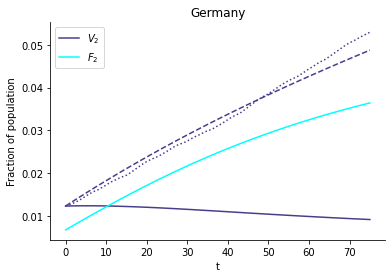

In [ ]:
import matplotlib
matplotlib.use('PS')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(2,2),dpi=300)

from matplotlib.ticker import MaxNLocator

fig,ax = plt.subplots()

ax.plot(V2,color='darkslateblue')
ax.plot(F2,color='aqua')

ax.legend([r'$V_2$',r'$F_2$'])

ax.plot(V2C,color='darkslateblue',linestyle='--')
ax.plot(V2D,color='darkslateblue',linestyle=':')

#ax.plot(F2C,color='slateblue',linestyle='--')
#ax.plot(F2D,color='slateblue',linestyle=':')

ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.title = 'r'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)

ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')

plt.savefig(pais + '-2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


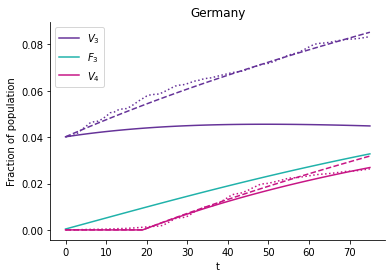

In [ ]:
fig,ax = plt.subplots()


ax.plot(V3,color='rebeccapurple')
ax.plot(F3,color='lightseagreen')
ax.plot(V4,color='mediumvioletred')
ax.legend([r'$V_3$',r'$F_3$',r'$V_4$'])



ax.plot(V3C,color='rebeccapurple',linestyle='--')
ax.plot(V3D,color='rebeccapurple',linestyle=':')
#ax.plot(F3D,color='lightseagreen',linestyle=':')
#ax.plot(F3C,color='mediumpurple',linestyle='--')


ax.plot(V4C,color='mediumvioletred',linestyle='--')
ax.plot(V4D,color='mediumvioletred',linestyle=':')


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.title = 'r'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#ax.xaxis.label.title = 't'
#ax.yaxis.label.title = 'Fraction of population'

ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()

plt.savefig(pais + '-3.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


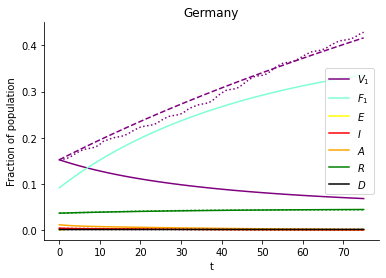

In [ ]:
fig,ax = plt.subplots()

ax.plot(V1,color='purple')
ax.plot(F1,color='aquamarine')
ax.plot(E,color='yellow')
ax.plot(I,color='red')
ax.plot(A,color='orange')
ax.plot(RC,color='green')
ax.plot(D,color='black')
ax.legend([r'$V_1$',r'$F_1$',r'$E$',r'$I$',r'$A$',r'$R$',r'$D$'])
#ax.legend([r'$E$',r'$I$',r'$A$',r'$R$',r'$D$'])
ax.plot(V1C,color='purple',linestyle='--')
ax.plot(V1D,color='purple',linestyle=':')
ax.plot(F1D,color='aquamarine',linestyle=':')
#ax.plot(F1C,color='mediumblue',linestyle='--')


ax.plot(ID,color='red',linestyle=':')
ax.plot(RD,color='green',linestyle=':')
ax.plot(DD,color='black',linestyle=':')
#plt.legend(['E','I','A','R','D'])


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.set_title = 't'
#ax.yaxis.label.set_title = 'Fraction of population'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.axes.xaxis.title = 't'
ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')
plt.savefig(pais + '-1.eps')
plt.show()

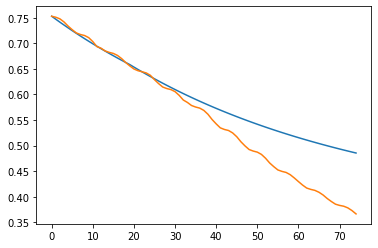

In [ ]:
plt.plot(S)
plt.plot(SD)
plt.show()

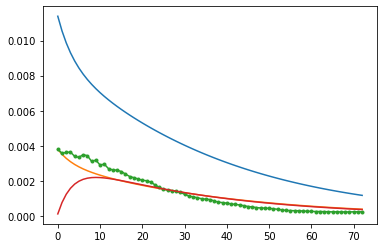

In [ ]:
plt.plot(A)
plt.plot(I)
plt.plot(ID,marker='.')
plt.plot(E)
plt.show()

In [ ]:
print(t+1)

75.0


In [ ]:
# Cota superior

e1L1 = 1 - 0.295
e1L2 = 1 - 0.89

e2L2 = 1 - 0.893

e3L1 = 1 - 0.318
e3L2 = 1 - 0.68

e4L1 = 1 - 0.599

In [ ]:
# Normal

# Pfizer
alpha1 = 1/180
e1L1 = 1-0.52
e1L2 = 1-0.95
e1A = 3.77e-4

# Moderna
alpha2 = 1/180
e2L1 = 1-0.8
e2L2 = 1-0.941
e2A = 7.23e-4

# AstraZeneca

alpha3 = 1/180
e3L1 = 1-0.463
e3L2 = 1-0.76
e3A = 0.00268

# Johnson&Johnson

alpha4 = 1/180
e4L1 = 1-0.663
e4A = 0.0091


In [ ]:
e1L1 = 1 - 0.684
e1L2 = 1 - 0.932

e2L2 = 1 - 0.968 # problema

e3L1 = 1 - 0.578
e3L2 = 1 - 0.82

e4L1 = 1 - 0.718

In [ ]:
# betas potenciadas
pot = 2

beta1 = beta1*pot
beta2 = beta2*pot

In [ ]:
# betas despotenciadas
pot = 2
beta1 = beta1/pot
beta2 = beta2/pot

In [ ]:
# Parámetros mermados

prop = 0.5

# Pfizer
alpha1 = 1/180
e1L1 = 1-0.52*prop
e1L2 = 1-0.95*prop
e1A = 3.77e-4

# Moderna
alpha2 = 1/180
e2L1 = 1-0.8*prop
e2L2 = 1-0.941*prop
e2A = 7.23e-4

# AstraZeneca

alpha3 = 1/180
e3L1 = 1-0.463*prop
e3L2 = 1-0.76*prop
e3A = 0.00268

# Johnson&Johnson

alpha4 = 1/180
e4L1 = 1-0.663*prop
e4A = 0.0091

In [ ]:
rr_3 -= 0.001

In [ ]:
# Reajuste
l4 = 1#1/180
alpha4 = 1 / 180
e4L2 = 0

S0 = 1 + (1+ l_1 / alpha1 )*(1-e1A)*(rr_1 / l_1) + (1+ l_2 / alpha2 )*(1-e2A)*(rr_2 / l_2)

if pais == 'Lithuania':
  S0 += (1+ l_3 / alpha3 )*(1-e3A)*(rr_3 / l_3) + (1+ l4 / alpha4 )*(1-e4A)*(rr_4 / l4)
else:
  S0 += (1+ l_3 / alpha3 )*(1-e3A)*(rr_3 / l_3) + (1+ l4 / alpha4 )*(1-e4A)*(rr2(rr_40,rr_41,theta_rr,t) / l4)
S0 = 1 / S0

V10 = (1-e1A)*rr_1* S0 / l_1
V20 = (1-e2A)*rr_2* S0 / l_2
V30 = (1-e3A)*rr_3* S0 / l_3

if pais == 'Lithuania': #or pais == 'Germany':
  V40 = (1-e4A)*rr_4* S0 / l4
else: 
  V40 = (1-e4A)*rr2(rr_40,rr_41,theta_rr,t)* S0 / l4

F10 = l_1* V10 / alpha1
F20 = l_2* V20 / alpha2
F30 = l_3* V30 / alpha3
F40 = l4* V40 / alpha4

R0 = w*beta1 / (gamma + delta) + (1-w)*beta2 / gamma

print('R0=',R0)

suma = e1L1*V10 + e1L2*F10 + e2L1*V20 + e2L2*F20 + e3L1*V30 + e3L2*F30 + e4L1*V40 + e4L2*F40  

Rc = R0*(S0 + suma)

print('Rc=',Rc)

R0= 1.5923016983775535
Rc= 1.089855293355831


In [ ]:
rr_3*(-0.2781687861570363 + 0.27279164757842256) / (0.001*0.2781687861570363)

-0.019608917027259226

In [ ]:
# Insuficiencia

print(R0*(e2L1 + l_1*e2L2/alpha2)/(1+l_2/alpha2)) 

0.2137130301889575


In [ ]:
eps1 = e1L1 + e1L2*l_1 / alpha1
eps2 = e2L1 + e2L2*l_2 / alpha2
eps3 = e3L1 + e3L2*l_3 / alpha3
eps4 = e4L1 + e4L2*l4 / alpha4

B_1 = (1 + l_1 / alpha1)*(1-e1A)/ l_1
B_2 = (1 + l_2 / alpha2)*(1-e2A)/ l_2
B_3 = (1 + l_3 / alpha3)*(1-e3A)/ l_3
B_4 = (1 + l4 / alpha4)*(1-e4A)/ l4


if pais == 'Lithuania':
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2 / l_2  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr_4 / l4
  eta2 = 1 + B_1*rr_1 + B_2*rr_2 + B_3*rr_3 + B_4*rr_4
else:
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2 / l_2  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t) / l4
  eta2 = 1 + B_1*rr_1 + B_2*rr_2 + B_3*rr_3 + B_4*rr2(rr_40,rr_41,theta_rr,t)


eta = eta1/eta2

print(eps1 / (1 + l_1 / alpha1))
print(eps2 / (1 + l_2 / alpha2))
print(eps3 / (1 + l_3 / alpha3))
print(eps4 / (1 + l4 / alpha4) )
print('eta=',eta)

0.5474626865671642
0.5368656716417911
0.66725
0.0036933701657458563
eta= 0.6844527607213626


In [ ]:
if pais == 'Lithuania':
  eta1 = 1 + eps2*(1-e2A)*rr_2 / l_2  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr_4 / l4
  eta2 = 1 + B_2*rr(rr_20,rr_21,t) + B_3*rr(rr_30,rr_31,t) + B_4*rr_4
else:
  eta1 = 1 + eps2*(1-e2A)*rr_2 / l_2  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t) / l4
  eta2 = 1 + B_2*rr_2 + B_3*rr_3 + B_4*rr2(rr_40,rr_41,theta_rr,t)


eta = eta1/eta2

print('eta1=',eta)

eta1= 0.785464110268421


In [ ]:
if pais == 'Lithuania':
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1+  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr_4 / l4
  eta2 = 1 + B_1*rr_1  + B_3*rr_3 + B_4*rr_4
else:
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t) / l4
  eta2 = 1 + B_1*rr_1  + B_3*rr_3 + B_4*rr2(rr_40,rr_41,theta_rr,t)


eta = eta1/eta2

print('eta2=',eta)

eta2= 0.6936123083787015


In [ ]:
if pais == 'Lithuania':
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2 / l_2  + eps4*(1-e4A)*rr_4 / l4
  eta2 = 1 + B_1*rr_1 + B_2*rr_2 + B_4*rr_4
else:
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2/ l_2 + eps4*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t) / l4
  eta2 = 1 + B_1*rr_1 + B_2*rr_2 +  B_4*rr2(rr_40,rr_41,theta_rr,t)


eta = eta1/eta2

print('eta3=',eta)

eta3= 0.6862533029683539


In [ ]:
eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2 / l_2 + eps3*(1-e3A)*rr_3 / l_3
eta2 = 1 + B_1*rr_1 + B_2*rr_2 + B_3*rr_3


eta = eta1/eta2

print('eta4=',eta)

eta4= 0.7318819376415241


In [ ]:
print(t+1)

76.0


In [ ]:
Gamma_beta1 = w*beta1/(R0*(gamma+ delta))
print(Gamma_beta1)

0.4238751250815822


In [ ]:
Gamma_beta2 = (1-w)*beta2 /(R0*gamma)
print(Gamma_beta2)

0.5761248749184178


In [ ]:
Gamma_gamma = -w*gamma*beta1/(R0*(gamma+delta)**2) - (1-w)*beta2/(gamma*R0)
print(Gamma_gamma)

-0.9948412393970468


In [ ]:
Gamma_delta = - w*beta1*delta/(R0*(gamma+delta)**2)
print(Gamma_delta)

-0.005158760602953102


In [ ]:
Gamma_w = w*beta1/((gamma+delta)*R0) - w*beta2/(gamma*R0)
print(Gamma_w)

0.23183350010877626


In [ ]:
v = Rc / (R0*S0)

suma1 = 1 + B_1*rr_1 + B_2*rr_2 + B_3*rr_3 + B_4*rr2(rr_40,rr_41,theta_rr,t)

Gamma_alpha1 = (1/(v*R0))*(-e1L2*(1-e1A)*rr_1*S0/alpha1 + v*(1-e1A*rr_1)/suma1**2)
print(Gamma_alpha1)

0.014749573237860218


In [ ]:
Gamma_alpha2 = (1/(v*R0))*(-e2L2*(1-e2A)*rr_2*S0/alpha2 + v*(1-e2A*rr_2)/suma1**2)
print(Gamma_alpha2)

0.15712683254593476


In [ ]:
Gamma_alpha3 = (1/(v*R0))*(-e3L2*(1-e3A)*rr_3*S0/alpha3 + v*(1-e3A*rr_3)/suma1**2)
print(Gamma_alpha3)

0.14427827424699902


In [ ]:
Gamma_alpha4 = (1/(v*R0))*(-e4L2*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t)*S0/alpha4 + v*(1-e4A*rr2(rr_40,rr_41,theta_rr,t))/suma1**2)
print(Gamma_alpha4) 

0.16032017652572148


In [ ]:
Gamma_r1 = (rr_1 / (v*S0))*(S0*eps1*(1-e1A)/l_1 - v*B_1/(suma1)**2 )
print(Gamma_r1)
D_r1 = (S0*eps1*(1-e1A)/l_1 - v*B_1/(suma1)**2 )
print(R0*D_r1)

-0.08494469077441036
-15.658153379290432


In [ ]:
Gamma_r2 = (rr_2 / (v*S0))*(S0*eps2*(1-e2A)/l_2 - v*B_2/(suma1)**2 )
print(Gamma_r2)
D_r2 = (S0*eps2*(1-e2A)/l_2 - v*B_2/(suma1)**2 )
print(R0*D_r2)

-0.012600294131577436
-16.863567704701385


In [ ]:
Gamma_r3 = (rr_3 / (v*S0))*(S0*eps3*(1-e3A)/l_3 - v*B_3/(suma1)**2 )
print(Gamma_r3)
D_r3 = S0*eps3*(1-e3A)/l_3 - v*B_3/(suma1)**2 
print(R0*D_r3)

-0.002381381046006586
-2.5766518891509125


In [ ]:
Gamma_r4 = (rr2(rr_40,rr_41,theta_rr,t) / (v*S0))*(S0*eps4*(1-e4A)/l_4 - v*B_4/(suma1)**2 )
print(Gamma_r4)
D_r4 = S0*eps4*(1-e4A)/l_4 - v*B_4/(suma1)**2
print(R0*D_r4)

-0.06478163324461732
-69.45782643547292


In [ ]:
Gamma_l1 = (1/(v*S0))*(-e1L1*(1-e1A)*rr_1*S0/l_1 + v*(1-e1A)*rr_1 /(l_1*suma1**2) )
print(Gamma_l1)

-0.004736153854653036


In [ ]:
Gamma_l2 = (1/(v*S0))*(-e2L1*(1-e2A)*rr_2*S0/l_2 + v*(1-e2A)*rr_2 /(l_2*suma1**2) )
print(Gamma_l2)

0.00328965327427971


In [ ]:
Gamma_l3 = (1/(v*S0))*(-e3L1*(1-e3A)*rr_3*S0/l_3 + v*(1-e3A)*rr_3 /(l_3*suma1**2) )
print(Gamma_l3)

-0.00718242336392537


In [ ]:
Gamma_l4 = (1/(v*S0))*(-e4L1*(1-e4A)*rr_40*S0/l4 + v*(1-e4A)*rr_41 /(l4*suma1**2) )
print(Gamma_l4)

0.00035985136707233553


In [ ]:
phi1 = eps1*(1-e1A)*S0 / l_1
phi2 = eps2*(1-e2A)*S0 / l_2
phi3 = eps3*(1-e3A)*S0 / l_3
phi4 = eps4*(1-e4A)*S0 / l4
print(phi1)
print(phi2)
print(phi3)
print(phi4)

6.814098336647678
5.290879632240601
31.465045463210753
0.11930359087521014


In [ ]:
print(t+1)
print(1/N)
print(i)

1070.0
1.2025445843404645e-08
5.935882905425055e-16


In [ ]:
ban1 = True
ban2 = True

if True:
  m = 1
  h1 = 1 / m

  v1 = V1D[0] 
  v1c = V1D[0]
  f1 = f10
  #f1c = F1D[0]
  v2 = V2D[0] 
  v2c = V2D[0]
  f2 = f20
  #f2c = F2D[0]
  v3 = V3D[0] 
  v3c = V3D[0]
  f3 = f30#F3D[0]
  #f3c = F3D[0]
  v4 = V4D[0]
  v4c = V4D[0]
  #s = SD[0]
  e = E0
  i = ID[0]
  a = (1-w)*ID[0]
  r = RD[0]
  rc = RD[0]  
  d = DD[0]
  s = SD[0]#1 - v1 - f1 - v2 - f2 - v3 - f3 - v4 - e - i - a - r - d 

  #print(s)

  V1 = [v1]
  V1C = [v1c]
  F1 = [f1]
  #F1C = [f1c]
  V2 = [v2]
  V2C = [v2c]
  F2 = [f2]
  #F2C = [f2c]
  V3 = [v3]
  V3C = [v3c]
  F3 = [f3]
  #F3C = [f3c]
  V4 = [v4]
  V4C = [v4c]


  S = [s]
  E = [e]
  I = [i]
  A = [a]
  R = [r]
  RC= [r]
  D = [d]

  PR = [rr_1,rr_2,rr_3,rr_40,rr_41,theta_rr]
  PL = [l_1,l_2,l_3]



  for tempo in range(1,len(TD) + 200): #10000

    t = tempo / m

    if  False: #t == 74:
      pot = 2
      beta1 = beta1*pot
      beta2 = beta2*pot

      prop = 0.75

      # Pfizer
      e1L1 = 1-0.52*prop
      e1L2 = 1-0.95*prop

      # Moderna
      e2L1 = 1-0.8*prop
      e2L2 = 1-0.941*prop

      # AstraZeneca
      e3L1 = 1-0.463*prop
      e3L2 = 1-0.76*prop

      # Johnson&Johnson
      e4L1 = 1-0.663*prop


    #print(v1+v2+s+e+i+a+h+u+r+d)
    v11 = v1 + h1*fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v1c1= v1c + h1*rr_1*s
    f11 = f1 + h1*fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f1c1= f1c + l(l_10,l_11,t)*(v1c1-f1c)#v
    v21 = v2 + h1*fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v2c1= v2c + h1*rr_2*s
    f21 = f2 + h1*fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f2c1= f2c + l(l_20,l_21,t)*(v2c1-f2c)#v
    v31 = v3 + h1*fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v3c1= v3c + h1*rr_3*s
    f31 = f3 + h1*fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f3c1= f3c + l(l_30,l_31,t)*(v3c1-f3c)#v
    v41 = v4 + h1*fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v4c1= v4c + h1*rr2(rr_40,rr_41,theta_rr,t)*s
    s1 = s + h1*fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    e1 = e + h1*fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    i1 = i + h1*fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    a1 = a + h1*fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    r11 = r + h1*fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    rc1= rc + h1*gamma*i
    d1 = d + h1*delta*i


    v1 = v11 + 0
    v1c = v1c1 + 0
    #f1c = f1c1 + 0
    f1 = f11 + 0
    v2 = v21 + 0
    v2c = v2c1 + 0  
    f2 = f21 + 0
    #f2c = f2c1 + 0
    v3 = v31 + 0
    v3c = v3c1 + 0
    #f3c = f3c1 + 0
    f3 = f31 + 0  
    v4 = v41 + 0
    v4c = v4c1 + 0
    s = s1 + 0
    e = e1 + 0
    i = i1 + 0
    a = a1 + 0
    r = r11 + 0
    rc = rc1 + 0
    d = d1 + 0

    if ban1 and i < 1/N:
      print(t)
      ban1 = False


    V1.append(v1)
    V1C.append(v1c)
    F1.append(f1)
    #F1C.append(f1c)
    V2.append(v2)
    V2C.append(v2c)
    F2.append(f2)
    #F2C.append(f2c)
    V3.append(v3)
    V3C.append(v3c)
    F3.append(f3)
    #F3C.append(f3c)
    V4.append(v4)
    V4C.append(v4c)
    S.append(s)
    E.append(e)
    I.append(i)
    A.append(a)
    R.append(r)
    RC.append(rc)
    D.append(d)

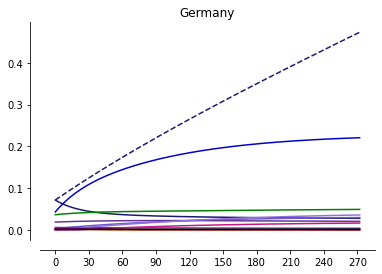

In [ ]:
fig,ax = plt.subplots()

ax.plot(V1,color='midnightblue')
ax.plot(F1,color='mediumblue')
ax.plot(V2,color='darkslateblue')
ax.plot(F2,color='slateblue')
ax.plot(V3,color='rebeccapurple')
ax.plot(F3,color='mediumpurple')
ax.plot(V4,color='mediumvioletred')
ax.plot(E,color='yellow')
ax.plot(I,color='red')
ax.plot(A,color='purple')
ax.plot(RC,color='green')
ax.plot(D,color='black')
#ax.legend([r'$V_1$',r'$F_1$',r'$E$',r'$I$',r'$A$',r'$R$',r'$D$'])
#ax.legend([r'$E$',r'$I$',r'$A$',r'$R$',r'$D$'])
ax.plot(V1C,color='midnightblue',linestyle='--')
#ax.plot(V1D,color='midnightblue',linestyle=':')
#ax.plot(F1D,color='mediumblue',linestyle=':')
#ax.plot(F1C,color='mediumblue',linestyle='--')


#ax.plot(ID,color='red',linestyle=':')
#ax.plot(RD,color='green',linestyle=':')
#ax.plot(DD,color='black',linestyle=':')
#plt.legend(['E','I','A','R','D'])


ax.set_title(pais)
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.title = 'r'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.savefig(pais + '-1.eps')
plt.show()

In [ ]:
print(S0)
t = 74#int(t)
print(V1D[t]+ V2D[t] + V3D[t] + V4D[t])
print(V1D[t]+ V2D[t] + V3D[t])
print(V1[t]+ V2[t] + V3[t] + V4[t] + F1[t] + F2[t] + F3[t])

0.3572677264448024
0.5861939176663644
0.560075539177482
0.5562321786273603


In [ ]:
print(100 - 100 * 0.5562321786273603 /0.5861939176663644 )

5.111233354020754


In [ ]:
I2 = I + []

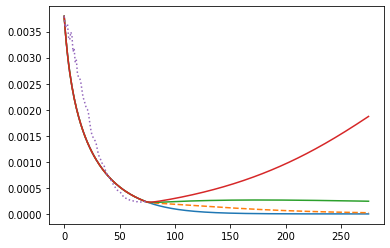

In [ ]:
plt.plot(I)
plt.plot(I1,linestyle='--')
plt.plot(I2)
plt.plot(I3)
plt.plot(ID,linestyle=':')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


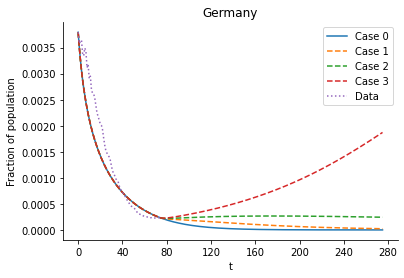

In [ ]:
fig,ax = plt.subplots()

#fig = plt.figure(figsize=(9,11))

ax.plot(I)
ax.plot(I1,linestyle='--')
ax.plot(I2,linestyle='--')
ax.plot(I3,linestyle='--')
ax.plot(ID,linestyle=':')
ax.legend([r'Case 0',r'Case 1',r'Case 2',r'Case 3',r'Data'])


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.set_title = 't'
#ax.yaxis.label.set_title = 'Fraction of population'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.axes.xaxis.title = 't'
ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')
plt.savefig(pais + '-4.eps',bbox_inches='tight')
plt.show()